Theta0: 1.6697833358689582
Theta1-n: [0.96705856 0.93717123]
Erreur quadratique moyenne : 0.77022622853241


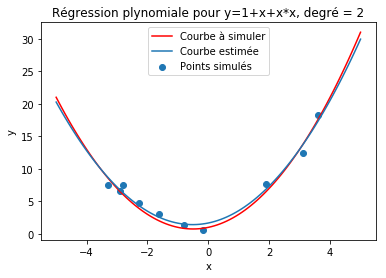

In [4]:
# Régression polynomiale avec sklearn pour des données quadratiques simulées 
# Transformation des données avec PolynomialFeatures

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def h_quadratique_univarie(theta,x):
    return theta[0]+theta[1]*x+theta[2]*x**2

# Génération de données avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (1,1,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires
degre_polynome = 2

X = np.random.rand(m)*10-5 # m valeurs de x entre -5 et 5
Y = h_quadratique_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Afficher les données aléatoires simulées

# Afficher la courbe du modèle simulé
X_modele = np.arange(-5,5.1,0.1) 
Y_modele = h_quadratique_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Courbe à simuler')

# Transformer avec PolynomialFeatures
transformateur_poly = PolynomialFeatures(degree=degre_polynome, include_bias=False)
X_poly = transformateur_poly.fit_transform(X[:,np.newaxis])
modele = LinearRegression(fit_intercept=True)
modele.fit(X_poly,Y)
print("Theta0:", modele.intercept_)
print("Theta1-n:", modele.coef_)
print("Erreur quadratique moyenne :", mean_squared_error(modele.predict(transformateur_poly.fit_transform(X[:,np.newaxis])),Y))

# Estimer les valeurs pour produire le graphique de la courbe estimée
X_modele_poly = transformateur_poly.fit_transform(X_modele[:,np.newaxis])
Y_estime = modele.predict(X_modele_poly)
plt.plot(X_modele,Y_estime,label='Courbe estimée')

titre = 'Régression plynomiale pour y=1+x+x*x, degré = '+str(degre_polynome)
plt.title(titre)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center')
plt.show() 